# Лабораторная работа № 3

**Цель работы**: ознакомление с амплитудной и частотной модуляцией, а также с амплитудной, частотной и фазовой манипуляцией (цифровыми сигналами) с помощью языка Python.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs('images', exist_ok=True)

%matplotlib inline

### Амплитудная модуляция (АМ)

**Листинг 1. Функция АМ-сигнала**

In [2]:
def signal_am(amp=1.0, km=0.25, fc=10.0, fs=2.0, period=100):
    t = 2.0 * np.pi * np.linspace(0, 1, period)
    return amp * (1 + km * np.cos(fs * t)) * np.cos(fc * t)

Построим графики, показывающие, как меняется форма и спектр АМсигнала при изменении параметра **несущей частоты**

**Листинг 2. Построение графиков АМ-сигналов (зависимость от несущей частоты `fc`)**

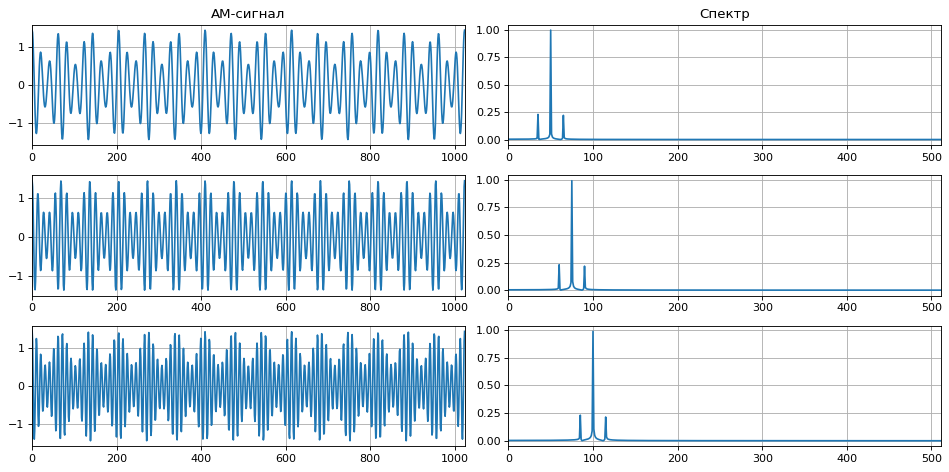

In [3]:
N = 1024
fs = 15
fc = [50, 75, 100]
sig = [signal_am(amp=1.0, km=0.45, fc=i, fs=fs, period=N) for i in fc]

# Вычисляем БПФ
sft = np.abs(np.fft.rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(fc):
    plt.subplot(len(fc), 2, 2 * i + 1)
    if i == 0:
        plt.title('АМ-сигнал')
    plt.plot(sig[i])
    plt.xlim([0, N - 1])
    plt.grid(True)
    
    plt.subplot(len(fc), 2, 2 * i + 2)
    if i == 0:
        plt.title('Спектр')
    plt.plot(sft[i])
    plt.xlim([0, N // 2 - 1])
    plt.grid(True)

plt.tight_layout()
plt.savefig('images/fig_am_fc.png', dpi=150, bbox_inches='tight')

Как видно, спектр АМ-сигнала состоит из трех компонент: центральная —
несущая, и две боковые — модулирующие. При изменении несущей частоты
происходит смещение всего АМ-сигнала по частоте.

Покажем, как меняется форма и спектр АМ-сигнала при изменении
параметра **частоты модулирующего колебания**

**Листинг 3. Построение графиков АМ-сигналов (зависимость от модулирующей частоты `fs`)**

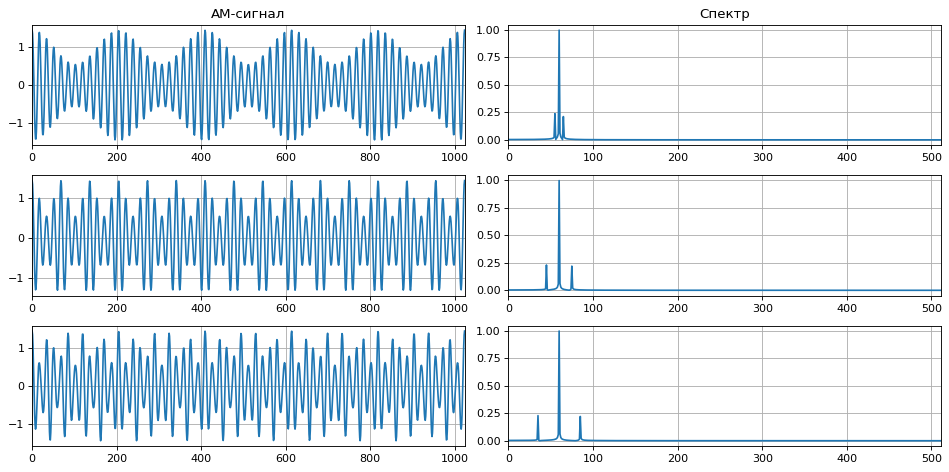

In [4]:
N = 1024
fs = [5, 15, 25]
fc = 60
sig = [signal_am(amp=1.0, km=0.45, fc=fc, fs=i, period=N) for i in fs]
sft = np.abs(np.fft.rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(fs):
    plt.subplot(len(fs), 2, 2 * i + 1)
    if i == 0:
        plt.title('АМ-сигнал')
    plt.plot(sig[i])
    plt.xlim([0, N - 1])
    plt.grid(True)
    
    plt.subplot(len(fs), 2, 2 * i + 2)
    if i == 0:
        plt.title('Спектр')
    plt.plot(sft[i])
    plt.xlim([0, N // 2 - 1])
    plt.grid(True)

plt.tight_layout()
plt.savefig('images/fig_am_fs.png', dpi=150, bbox_inches='tight')

Как видно, при изменении модулирующей частоты, спектр не сдвигается,
но изменяется расстояние между центральной (несущей) частотой и боковыми
(модулирующими) частотами. Ширина спектра АМ сигнала равна удвоенной
частоте модулирующего сигнала.

Посмотрим, как меняется форма и спектр АМ-сигнала при
изменении параметра **коэффициента модуляции**

**Листинг 4. Построение графиков АМ-сигналов (зависимость от коэффициента модуляции `km`)**

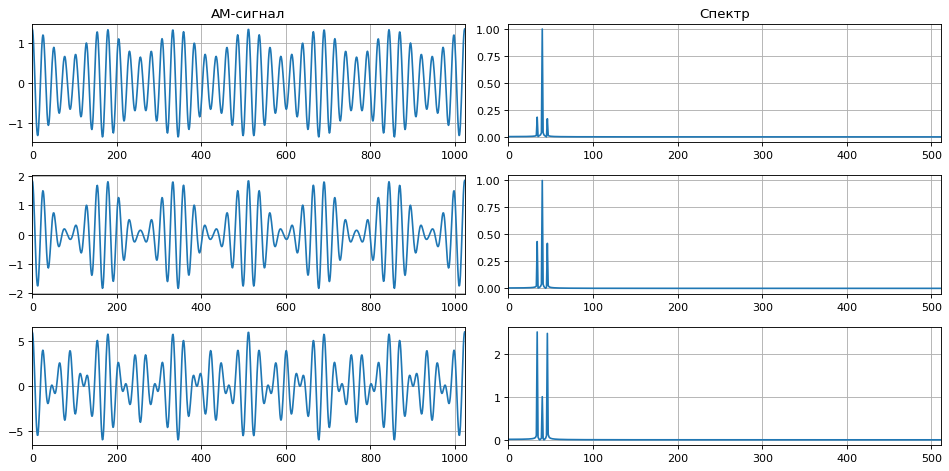

In [5]:
N = 1024
fs = 6
fc = 40
km = [0.35, 0.85, 5] # Значение 5 вызывает сильную перемодуляцию
sig = [signal_am(amp=1.0, km=i, fc=fc, fs=fs, period=N) for i in km]
sft = np.abs(np.fft.rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(km):
    plt.subplot(len(km), 2, 2 * i + 1)
    if i == 0:
        plt.title('АМ-сигнал')
    plt.plot(sig[i])
    plt.xlim([0, N - 1])
    plt.grid(True)
    
    plt.subplot(len(km), 2, 2 * i + 2)
    if i == 0:
        plt.title('Спектр')
    plt.plot(sft[i])
    plt.xlim([0, N // 2 - 1])
    plt.grid(True)

plt.tight_layout()
plt.savefig('images/fig_am_km.png', dpi=150, bbox_inches='tight')

Как видно, при изменении коэффициента модуляции, спектр сигнала
остается на месте. Меняется только уровень боковых составляющих. Заметим, что
при k<sub>m</sub> >1 возникает так называемая избыточная модуляция (перемодуляция).
Максимальное значение коэффициента модуляции, при котором не возникает
перемодуляции АМ-сигнала k<sub>m</sub> = 1.

### Частотная модуляция (ЧМ)

**Листинг 5. Функция ЧМ-сигнала**

In [6]:
def signal_fm(amp=1.0, kd=0.25, fc=10.0, fs=2.0, period=100):
    t = 2.0 * np.pi * np.linspace(0, 1, period)
    return amp * np.cos(fc * t + kd / fs * np.sin(fs * t))

Построим графики трёх сигналов: несущего, модулирующего и
фазомодулированного

**Листинг 6. Построение графиков несущего, модулирующего и ЧМ-сигнала**

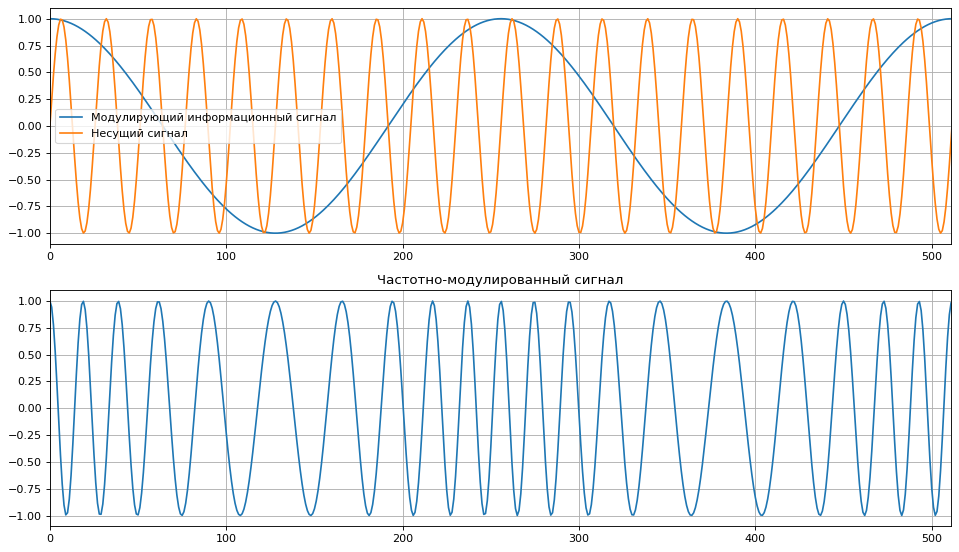

In [7]:
N = 1024
sig = signal_fm(amp=1.0, kd=15, fc=40, fs=4, period=N)
smd = np.cos(4 * 2.0 * np.pi * np.linspace(0, 1, N))
car = np.sin(40 * 2.0 * np.pi * np.linspace(0, 1, N))

plt.figure(figsize=(12, 7), dpi=80)
plt.subplot(2, 1, 1)
plt.plot(smd, label='Модулирующий информационный сигнал')
plt.plot(car, label='Несущий сигнал')
plt.xlim([0, N // 2 - 1])
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Частотно-модулированный сигнал')
plt.plot(sig)
plt.xlim([0, N // 2 - 1])
plt.grid(True)
plt.tight_layout()
plt.savefig('images/fig_fm_signal.png', dpi=150, bbox_inches='tight')

Построим сигналы с частотной модуляцией в зависимости от значения
девиации частоты 

**Листинг 7. Построение графиков ЧМ-сигналов (в зависимости от девиации частоты)**

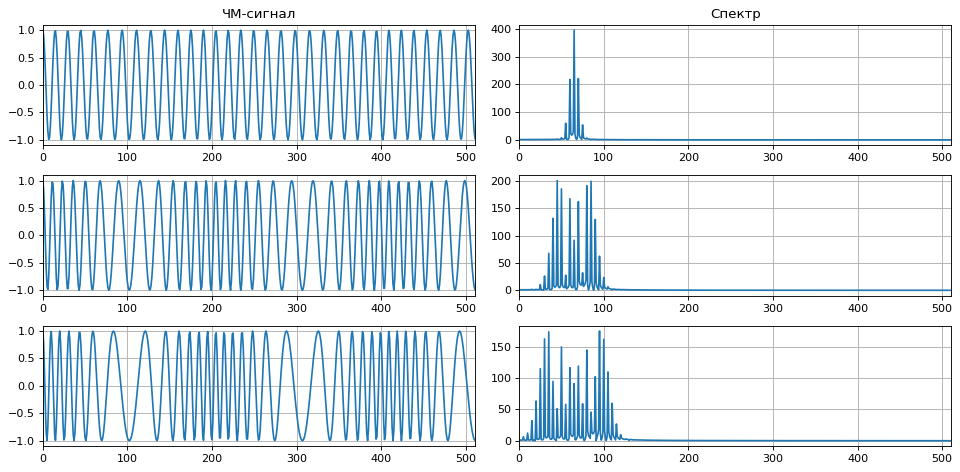

In [8]:
N = 1024
fs = 5
fc = 65
kd = [5, 25, 40]
sig = [signal_fm(amp=1.0, kd=i, fc=fc, fs=fs, period=N) for i in kd]
sft = np.abs(np.fft.fft(sig, axis=1))

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(kd):
    plt.subplot(len(kd), 2, 2 * i + 1)
    if i == 0:
        plt.title('ЧМ-сигнал')
    plt.plot(sig[i])
    plt.xlim([0, N // 2 - 1])
    plt.grid(True)
    
    plt.subplot(len(kd), 2, 2 * i + 2)
    if i == 0:
        plt.title('Спектр')
    plt.plot(sft[i])
    plt.xlim([0, N // 2 - 1])
    plt.grid(True)

plt.tight_layout()
plt.savefig('images/fig_fm_kd.png', dpi=150, bbox_inches='tight')

Как видно, чем больше коэффициент модуляции, тем шире спектр сигнала
с частотной модуляцией.

### Манипуляция (цифровые сигналы)

**Листинг 8. Амплитудная манипуляция цифрового сигнала (АМн)**

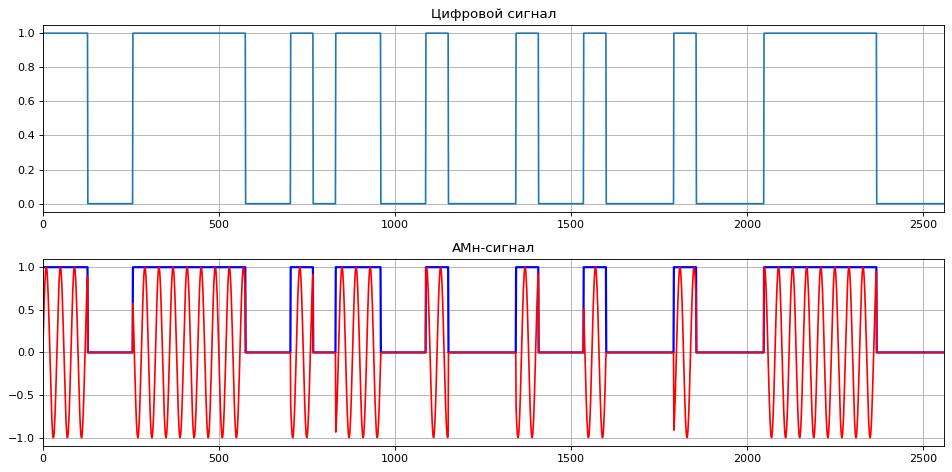

In [9]:
N = 64
np.random.seed(1)
mod_rnd = np.random.randint(0, 2, 40)
mod_ask = np.repeat(mod_rnd, repeats=N)
M = mod_ask.size
sig_ask = mod_ask * np.sin(64 * 2.0 * np.pi * np.linspace(0, 1, M))

plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Цифровой сигнал')
plt.plot(mod_ask)
plt.xlim([0, M - 1])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('АМн-сигнал')
plt.plot(mod_ask, 'b', linewidth=2.0)
plt.plot(sig_ask, '-r')
plt.xlim([0, M - 1])
plt.grid(True)

plt.tight_layout()
plt.savefig('images/fig_ask.png', dpi=150, bbox_inches='tight')

При ЧМн меняется только частота сигнала, а амплитуда и фаза остаются неизменными. Логическим '0' и '1' назначаются две разные ортогональные частоты. Аппаратно это реализуется переключением мультиплексора между двумя генераторами частот в зависимости от текущего передаваемого бита.

**Листинг 9. Частотная манипуляция цифрового сигнала (ЧМн)**

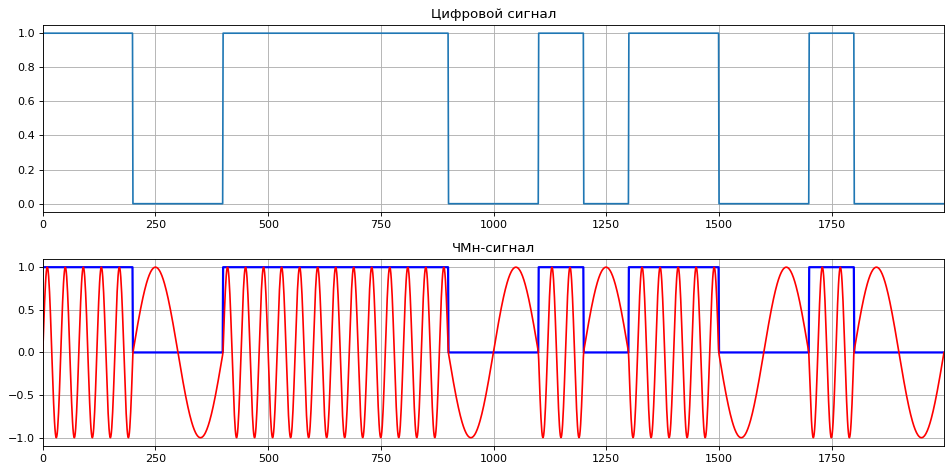

In [10]:
N = 100
np.random.seed(1)
mod_rnd = np.random.randint(0, 2, 20)
mod_fsk = np.repeat(mod_rnd, repeats=N)
M = mod_fsk.size

mod_frq = np.zeros(M)
mod_frq[mod_fsk == 0] = 10
mod_frq[mod_fsk == 1] = 50
sig_fsk = np.sin(mod_frq * 2.0 * np.pi * np.linspace(0, 1, M))

plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Цифровой сигнал')
plt.plot(mod_fsk)
plt.xlim([0, M - 1])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('ЧМн-сигнал')
plt.plot(mod_fsk, 'b', linewidth=2.0)
plt.plot(sig_fsk, '-r')
plt.xlim([0, M - 1])
plt.grid(True)

plt.tight_layout()
plt.savefig('images/fig_fsk.png', dpi=150, bbox_inches='tight')

**Листинг 10. Фазовая манипуляция цифрового сигнала (ФМн)**

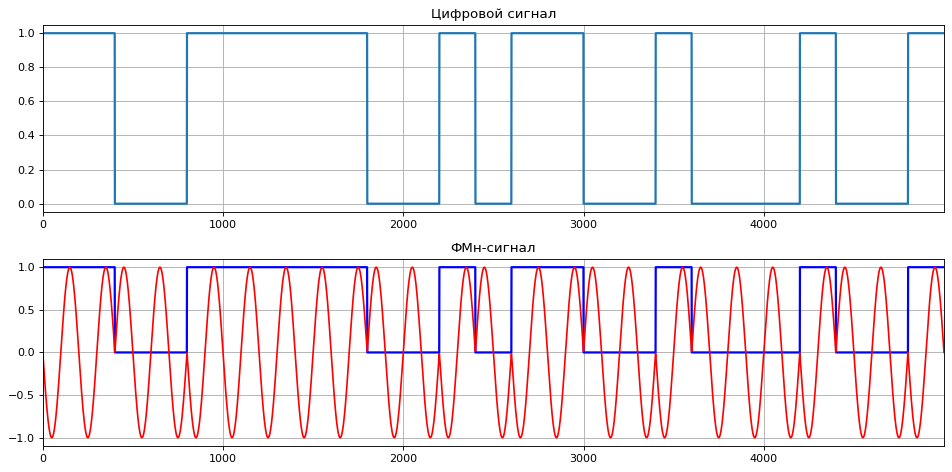

In [11]:
N = 200
np.random.seed(1)
mod_rnd = np.random.randint(0, 2, 25)
mod_psk = np.repeat(mod_rnd, repeats=N)
M = mod_psk.size

# Здесь исправлена опечатка из текста: добавлен знак `+` перед `np.pi * mod_psk`
sig_psk = np.sin(25 * 2.0 * np.pi * np.linspace(0, 1, M) + np.pi * mod_psk)

plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Цифровой сигнал')
plt.plot(mod_psk, color='C0', linewidth=2.0)
plt.xlim([0, M - 1])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('ФМн-сигнал')
plt.plot(mod_psk, 'b', linewidth=2.0)
plt.plot(sig_psk, '-r')
plt.xlim([0, M - 1])
plt.grid(True)

plt.tight_layout()
plt.savefig('images/fig_psk.png', dpi=150, bbox_inches='tight')

## Контрольные вопросы

1. **Что такое модуляция?**

Модуляция — это процесс изменения одного или нескольких параметров высокочастотного несущего колебания (амплитуды, частоты, фазы) по закону передаваемого низкочастотного информационного сигнала.

2. **Какие виды модуляции существуют?**

Существуют аналоговые виды модуляции (амплитудная (АМ), частотная (ЧМ), фазовая (ФМ)) и цифровые виды модуляции (манипуляции): амплитудная (АМн), частотная (ЧМн), фазовая (ФМн).

3. **Что такое амплитудная модуляция?**

Амплитудная модуляция (АМ) — это вид модуляции, при котором амплитуда высокочастотного несущего сигнала изменяется пропорционально мгновенному значению модулирующего информационного сигнала.

4. **Что такое фазовая модуляция?**

Фазовая модуляция (ФМ) — это вид модуляции, при котором фаза высокочастотного несущего колебания изменяется пропорционально мгновенному значению амплитуды модулирующего сигнала.

5. **Что такое частотная модуляция?**

Частотная модуляция (ЧМ) — это вид модуляции, при котором частота высокочастотного несущего сигнала изменяется пропорционально мгновенному значению амплитуды модулирующего сигнала.

6. **Что такое манипуляция?**

Манипуляция (или цифровая модуляция) — это процесс модуляции, при котором параметры несущего сигнала (амплитуда, частота или фаза) изменяются скачкообразно в соответствии с дискретными (цифровыми) значениями информационного сигнала (например, '0' и '1').

7. **Что такое модулирующий сигнал?**

Модулирующий сигнал — это первичный информационный (низкочастотный) сигнал, который содержит передаваемую информацию и управляет изменениями параметров несущего колебания в процессе модуляции.

7. **Что такое несущая частота?**

Несущая частота — это частота высокочастотного (несущего) периодического колебания, параметры которого (амплитуда, частота, фаза) изменяются в процессе модуляции для передачи информационного сигнала на расстояние.

9. **При амплитудной модуляции как влияет на спектр сигнала изменение коэффициента модуляции?**

При изменении коэффициента амплитудной модуляции $k_m$ изменяется амплитуда боковых лепестков (гармоник) в спектре АМ-сигнала. Чем больше $k_m$, тем больше амплитуда боковых лепестков относительно центральной несущей. Если $k_m > 1$, происходит перемодуляция, что приводит к значительным нелинейным искажениями и появлению дополнительных гармоник в спектре.

10. **При частотной модуляции как влияет на спектр сигнала изменение коэффициента модуляции (девиации частоты)?**

При увеличении девиации частоты (коэффициента частотной модуляции $k_d$) ширина спектра ЧМ-сигнала увеличивается, а количество боковых лепестков возрастает. Мощность сигнала перераспределяется между большим числом боковых гармоник, и амплитуда составляющей на центральной несущей частоте может значительно уменьшаться или даже становиться равной нулю.